# PROJETO DE INSIGHT
### Este trabalho é focado unicamente no uso de ferramentas de análise de dados, sem quaisquer mecanismos de inteligência artificial. A intenção é aproveitar o poder da análise nas decisões.

# Contexto: Aumentando a receita na revenda de casas
O ano é 2015 e o novo <i>CEO</i> de uma empresa de compra e venda de casas quer inovar nos negócios para aumentar a receita. Para isso, contratou um Cientista de Dados para buscar por <i>Insights</i> a partir de um conjunto de dados sobre diversas casas numa tabela que contém as seguintes colunas e suas descrições:
- <i>id</i>: Código de identificação da casa;
- <i>date</i>: Data de quando a casa foi vendida;
- <i>price</i>: Preço de quando a casa foi vendida;
- <i>bedrooms</i>: Número de quartos;
- <i>bathrooms</i>: Número de banheiros;
- <i>sqft_living</i>: Área em pés quadrados da sala de estar;
- <i>sqrt_lot</i>: Área em pés quadrados do lote;
- <i>floors</i>: Número de andares;
- <i>waterfront</i>: Se a casa fica à beira-mar;
- <i>view</i>: Número de vistas externas (sacadas, janelas, etc.);
- <i>condition</i>: Fator de condição estrutural;
- <i>grade</i>: Fator de qualidade do acabamento e materiais;
- <i>sqft_above</i>: Área em pés quadrados acima do porão;
- <i>sqft_basement</i>: Área em pés quadrados do porão;
- <i>yr_built</i>: Ano de construção;
- <i>yr_renovated</i>: Ano de reforma;
- <i>zipcode</i>: Código de endereço (CEP no Brasil);
- <i>lat</i>: Coordenada de latitude;
- <i>long</i>: Coordenada de longitude;
- <i>sqft_living15</i>: Área em pés quadrados da sala de estar em 2015 (implica algumas reformas);
- <i>sqrt_lot15</i>: Área em pés quadrados do lote em 2015 (implica algumas reformas).

Fonte dos dados: <https://www.kaggle.com/harlfoxem/housesalesprediction>

Para esse objetivo, o <i>CEO</i> fez as seguintes perguntas:
1. Quais casas a empresa deve comprar e por quais preços de compra?
2. Uma vez as casas em posse da empresa, qual o melhor momento para vendê-las e qual seria os preços de venda?
3. A Empresa deve fazer reformas para aumentar os preços de venda? Quais seriam as sugestões de mudanças? Quais incrementos nos preços dados por cada opção de reforma?

# Módulos

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr

# 1. Pré-processamento dos dados

>Dataset:

In [2]:
df_houses = pd.read_csv('kc_house_data.csv').set_index('id')
df_houses

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007


>Verificando tipos de dados de cada coluna...

In [3]:
df_houses.dtypes

date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

>Apena a coluna "date" deve ter seu tipo alterado (no caso, para datetime). Fazendo isso...

In [4]:
df_houses['date'] = pd.to_datetime(df_houses['date'])
df_houses.dtypes

date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

>Verificando dados nulos nas colunas...

In [5]:
df_houses.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

>Não há dados nulos. Agora, precisamos verificar dados equivalentes aos nulos. Podem ser um simples caractere como "-" ou o número "0", dependendo da interpretação da coluna. Vamos identificar eles.

In [6]:
(df_houses == '-').sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [7]:
(df_houses == 0).sum()

date                 0
price                0
bedrooms            13
bathrooms           10
sqft_living          0
sqft_lot             0
floors               0
waterfront       21450
view             19489
condition            0
grade                0
sqft_above           0
sqft_basement    13126
yr_built             0
yr_renovated     20699
zipcode              0
lat                  0
long                 0
sqft_living15        0
sqft_lot15           0
dtype: int64

>O caractere "-" não foi detectado em nenhuma coluna, mas o valor "0" foi. A coluna "yr_renovated" é a única que faz sentido dizer que o "0" é um dado nulo, pois se o imóvel nunca foi reformado, então não podemos determinar seu ano de reforma. As outras colunas com valores "0" faz sentido dizer que são zero mesmo e não nulo. Vamos substituir por dado nulo os zeros da coluna "yr_renovated", pois não faz sentido substituí-los por algum valor como a média, o valor mínimo ou máximo. Nesse caso, deve ser nulo mesmo.

In [8]:
df_houses['yr_renovated'] = df_houses['yr_renovated'].apply(lambda x: np.nan if x == 0 else x)
df_houses[['yr_renovated']]

,yr_renovated
id,
7129300520,NaN
6414100192,1991.0
5631500400,NaN
2487200875,NaN
1954400510,NaN
...,...
263000018,NaN
6600060120,NaN
1523300141,NaN


>Para que a data de venda do imóvel seja comparável com valores das outras colunas, precisamos converter o tipo de dado de datetime para números. Uma boa transformação para isso é converter na quantidade de dias que o imóvel foi vendido a partir de uma data determinada. Vamos determinar essa data fixa como sendo a mais recente de todas do dataset.

In [9]:
most_recent_datetime = df_houses['date'].max()
print('- Data mais recente do dataset para servir de referência na contagem de dias passados em que o imóvel foi vendido:', most_recent_datetime)

- Data mais recente do dataset para servir de referência na contagem de dias passados em que o imóvel foi vendido: 2015-05-27 00:00:00


In [10]:
df_houses['count_days_sold'] = df_houses['date'].apply(lambda x: (most_recent_datetime-x).days)
df_houses[['count_days_sold']]

,count_days_sold
id,
7129300520,226
6414100192,169
5631500400,91
2487200875,169
1954400510,98
...,...
263000018,371
6600060120,93
1523300141,338


>É interessante também observarmos as diferenças de medidas entre as features com valores em 2015 e antes. É o caso dos pares "sqft_living15" com "sqft_living" e "sqft_lot15" com "sqft_lot". Iremos calcular a diferença entre as features de cada par, criando novas features.

In [11]:
df_houses['diff_sqft_living15_with_sqft_living'] = df_houses['sqft_living15']-df_houses['sqft_living']
df_houses['diff_sqft_lot15_with_sqft_lot'] = df_houses['sqft_lot15']-df_houses['sqft_lot']
df_houses[['diff_sqft_living15_with_sqft_living', 'diff_sqft_lot15_with_sqft_lot']]

,diff_sqft_living15_with_sqft_living,diff_sqft_lot15_with_sqft_lot
id,,
7129300520,160,0
6414100192,-880,397
5631500400,1950,-1938
2487200875,-600,0
1954400510,120,-577
...,...,...
263000018,0,378
6600060120,-480,1387
1523300141,0,657


# 2. Análise
Nossa coluna alvo é o preço, enquanto as outras serão features/variáveis. Vamos observar a correlação entre as features. Antes, precisamos determinar o método de correlação (pearson ou spearman). Para isso, vamos verificar se as distribuições nas features pelo menos se aproximam da curva normal.

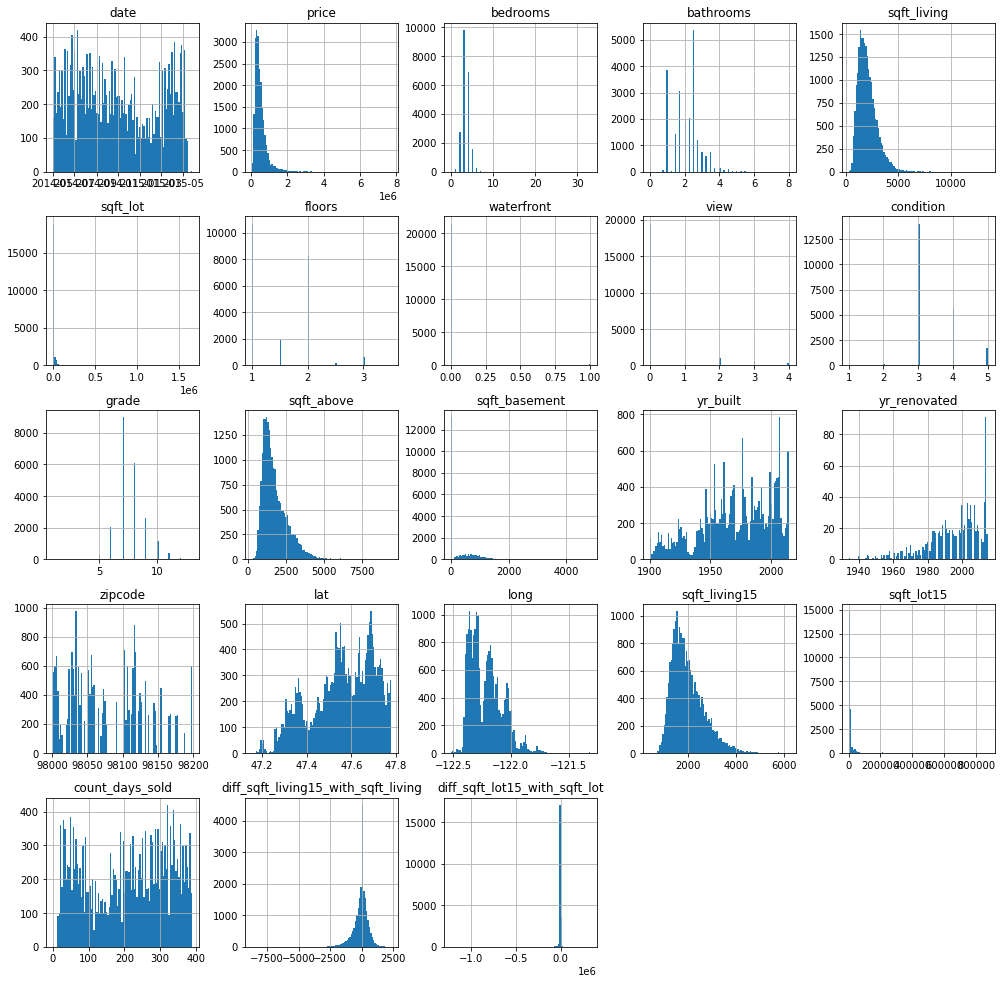

In [12]:
df_houses.hist(figsize=(17, 17), bins=100);

>Não há semelhança alguma com a curva normal em qualquer das features. Portanto, o método de correlação mais adequado é o de spearman. Agora sim, vamos verificar as correlações.

In [13]:
df_corr_pearson = df_houses.corr(method='spearman')
df_corr_pearson.style.background_gradient(axis=None, vmin=-1, vmax=1, cmap="RdBu")

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,count_days_sold,diff_sqft_living15_with_sqft_living,diff_sqft_lot15_with_sqft_lot
price,1.000000,0.344652,0.497160,0.644191,0.074939,0.322347,0.115089,0.293931,0.018490,0.658215,0.541752,0.251704,0.102038,0.162088,-0.008735,0.456409,0.063537,0.572290,0.062766,0.010797,-0.277666,-0.048206
bedrooms,0.344652,1.000000,0.521406,0.647366,0.216531,0.227541,-0.007598,0.081421,0.012660,0.380534,0.539704,0.230496,0.180022,0.160783,-0.167186,-0.021185,0.191389,0.443816,0.201577,0.017084,-0.442517,-0.080285
bathrooms,0.497160,0.521406,1.000000,0.745526,0.068805,0.546800,0.049522,0.155549,-0.162891,0.658194,0.691006,0.191848,0.566982,0.242511,-0.204783,0.008283,0.261539,0.570304,0.063111,0.033740,-0.430630,-0.031868
sqft_living,0.644191,0.647366,0.745526,1.000000,0.304159,0.401267,0.070326,0.232994,-0.062638,0.716400,0.843504,0.327878,0.352421,0.109500,-0.206848,0.030980,0.284584,0.746982,0.283864,0.034613,-0.598176,-0.105228
sqft_lot,0.074939,0.216531,0.068805,0.304159,1.000000,-0.234433,0.085601,0.117033,0.114724,0.152049,0.272408,0.036624,-0.037569,-0.162396,-0.319494,-0.122052,0.370551,0.359572,0.922316,0.013225,-0.041292,-0.343627
floors,0.322347,0.227541,0.546800,0.401267,-0.234433,1.000000,0.023879,0.019655,-0.287915,0.501684,0.599280,-0.272458,0.551663,-0.005645,-0.061461,0.024564,0.148651,0.305434,-0.231386,0.023274,-0.226857,0.048118
waterfront,0.115089,-0.007598,0.049522,0.070326,0.085601,0.023879,1.000000,0.284924,0.016744,0.062189,0.054490,0.051969,-0.028605,-0.130245,0.029591,-0.019044,-0.038139,0.074564,0.092271,-0.002108,-0.025877,-0.002453
view,0.293931,0.081421,0.155549,0.232994,0.117033,0.019655,0.284924,1.000000,0.046000,0.217044,0.144394,0.236525,-0.066607,-0.090811,0.078215,-0.000073,-0.102728,0.255793,0.116520,-0.000259,-0.067149,-0.034034
condition,0.018490,0.012660,-0.162891,-0.062638,0.114724,-0.287915,0.016744,0.046000,1.000000,-0.167374,-0.158126,0.161623,-0.393816,-0.385095,-0.022416,-0.022341,-0.085270,-0.086905,0.117719,0.045326,-0.019299,-0.016740
grade,0.658215,0.380534,0.658194,0.716400,0.152049,0.501684,0.062189,0.217044,-0.167374,1.000000,0.711815,0.092927,0.500633,0.209683,-0.181552,0.103921,0.222791,0.662635,0.156109,0.041063,-0.270327,-0.022112


>Abaixo, temos as faixas de valores por direção e nível de correlação:
>- -1 <= Correlação <= -0.9 : inversa e muito forte.
>- -0.9 < Correlação <= -0.7 : inversa e forte.
>- -0.7 < Correlação <= -0.5 : inversa e moderada.
>- -0.5 < Correlação <= -0.3 : inversa e fraca.
>- -0.3 < Correlação < 0.3 : desprezível.
>- 0.3 <= Correlação < 0.5 : direta e fraca.
>- 0.5 <= Correlação < 0.7 : direta e moderada.
>- 0.7 <= Correlação < 0.9 : direta e forte.
>- 0.9 <= Correlação <= 1 : direta e muito forte.

>A intenção de sabermos as correlações é detectar features semelhantes (direta ou inversa muito forte entre features) e vazamentos de dados (direta ou inversa muito forte entre feature e a label "price"). Para as features semelhantes podemos excluir uma delas sem prejuízo à análise. Quanto aos vazamentos de dados, podemos também excluir a feature que causou o vazamento. Para verificarmos essas premissas, vamos transformar a tabela acima em uma nova com os níveis de correlação independente da direção inversa ou direta.

In [14]:
def get_corr_by_level(corr):
    if corr <= -0.9 or corr >= 0.9: return '- muito forte' if corr < 0 else '+ muito forte'
    elif corr <= -0.7 or corr >= 0.7: return '- forte' if corr < 0 else '+ forte'
    elif corr <= -0.5 or corr >= 0.5: return '- moderada' if corr < 0 else '+ moderada'
    elif corr <= -0.3 or corr >= 0.3: return '- fraca' if corr < 0 else '+ fraca'
    else: return '- desprezível' if corr < 0 else '+ desprezível'

map_color_to_corr = {
    '- muito forte': 'background-color: #3a3a9b;',
    '+ muito forte': 'background-color: #3a3a9b;',
    '- forte': 'background-color: #4a4aff;',
    '+ forte': 'background-color: #4a4aff;',
    '- moderada': 'background-color: #a4a4ff;',
    '+ moderada': 'background-color: #a4a4ff;',
    '- fraca': 'background-color: #d9d9ff;',
    '+ fraca': 'background-color: #d9d9ff;',
    '- desprezível': 'background-color: #ffffff;',
    '+ desprezível': 'background-color: #ffffff;',
}

df_corr_pearson_by_level = df_corr_pearson.apply(lambda col: col.apply(lambda x: get_corr_by_level(x)))
df_corr_pearson_by_level.style.applymap(lambda x: map_color_to_corr[x])

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,count_days_sold,diff_sqft_living15_with_sqft_living,diff_sqft_lot15_with_sqft_lot
price,+ muito forte,+ fraca,+ fraca,+ moderada,+ desprezível,+ fraca,+ desprezível,+ desprezível,+ desprezível,+ moderada,+ moderada,+ desprezível,+ desprezível,+ desprezível,- desprezível,+ fraca,+ desprezível,+ moderada,+ desprezível,+ desprezível,- desprezível,- desprezível
bedrooms,+ fraca,+ muito forte,+ moderada,+ moderada,+ desprezível,+ desprezível,- desprezível,+ desprezível,+ desprezível,+ fraca,+ moderada,+ desprezível,+ desprezível,+ desprezível,- desprezível,- desprezível,+ desprezível,+ fraca,+ desprezível,+ desprezível,- fraca,- desprezível
bathrooms,+ fraca,+ moderada,+ muito forte,+ forte,+ desprezível,+ moderada,+ desprezível,+ desprezível,- desprezível,+ moderada,+ moderada,+ desprezível,+ moderada,+ desprezível,- desprezível,+ desprezível,+ desprezível,+ moderada,+ desprezível,+ desprezível,- fraca,- desprezível
sqft_living,+ moderada,+ moderada,+ forte,+ muito forte,+ fraca,+ fraca,+ desprezível,+ desprezível,- desprezível,+ forte,+ forte,+ fraca,+ fraca,+ desprezível,- desprezível,+ desprezível,+ desprezível,+ forte,+ desprezível,+ desprezível,- moderada,- desprezível
sqft_lot,+ desprezível,+ desprezível,+ desprezível,+ fraca,+ muito forte,- desprezível,+ desprezível,+ desprezível,+ desprezível,+ desprezível,+ desprezível,+ desprezível,- desprezível,- desprezível,- fraca,- desprezível,+ fraca,+ fraca,+ muito forte,+ desprezível,- desprezível,- fraca
floors,+ fraca,+ desprezível,+ moderada,+ fraca,- desprezível,+ muito forte,+ desprezível,+ desprezível,- desprezível,+ moderada,+ moderada,- desprezível,+ moderada,- desprezível,- desprezível,+ desprezível,+ desprezível,+ fraca,- desprezível,+ desprezível,- desprezível,+ desprezível
waterfront,+ desprezível,- desprezível,+ desprezível,+ desprezível,+ desprezível,+ desprezível,+ muito forte,+ desprezível,+ desprezível,+ desprezível,+ desprezível,+ desprezível,- desprezível,- desprezível,+ desprezível,- desprezível,- desprezível,+ desprezível,+ desprezível,- desprezível,- desprezível,- desprezível
view,+ desprezível,+ desprezível,+ desprezível,+ desprezível,+ desprezível,+ desprezível,+ desprezível,+ muito forte,+ desprezível,+ desprezível,+ desprezível,+ desprezível,- desprezível,- desprezível,+ desprezível,- desprezível,- desprezível,+ desprezível,+ desprezível,- desprezível,- desprezível,- desprezível
condition,+ desprezível,+ desprezível,- desprezível,- desprezível,+ desprezível,- desprezível,+ desprezível,+ desprezível,+ muito forte,- desprezível,- desprezível,+ desprezível,- fraca,- fraca,- desprezível,- desprezível,- desprezível,- desprezível,+ desprezível,+ desprezível,- desprezível,- desprezível
grade,+ moderada,+ fraca,+ moderada,+ forte,+ desprezível,+ moderada,+ desprezível,+ desprezível,- desprezível,+ muito forte,+ forte,+ desprezível,+ moderada,+ desprezível,- desprezível,+ desprezível,+ desprezível,+ moderada,+ desprezível,+ desprezível,- desprezível,- desprezível


>Temos apenas uma situação em que duas features são semelhante (correlação muito forte): entre "sqtf_lot15" e "sqtf_lot". De fato, ambos são muito semelhantes, pois representam a área do lote com a diferença que um é referente ao ano de 2015 sujeito a alterações por reforma e o outro não tem um ano específico. Mas com a correlação muito forte, não faz sentido continuar com os dois. Por isso, vamos ficar com apenas um deles, no caso, a área do lote mais recente "sqtf_lot15".

>Sobre vazamento de dados, não temos nenhuma feature com correlação muito forte com o label "price".

In [15]:
df_houses.drop('sqft_lot', axis=1, inplace=True)
print('- Feature excluída: "sqft_lot"')

- Feature excluída: "sqft_lot"


>Ainda olhando para os níveis de correlações, podemos dizer que as features de níveis não despresíveis são aquelas que influenciam significativamente na label "price". Olhando também os valores de correlações para essas mesmas features, todas são positivas, mostrando uma relação direta, onde quanto mais, maior o preço do imóvel. Essas features influenciadoras elas:
>- **bedrooms**: quanto mais quartos, maior o preço.
>- **bathrooms**: quanto mais banheiros, maior o preço.
>- **sqft_living**: quanto maior a sala de estar, maior o preço.
>- **floors**: quanto mais andares, maior o preço.
>- **grade**: quanto melhor o acabamento e materiais, maior o preço.
>- **sqft_above**: quanto maior a área do imóvel acima do porão, maior o preço.
>- **lat**: quanto mais ao norte, maior o preço.
>- **sqft_living15**: quanto maior a sala de estar em 2015, maior o preço.

>Todas as outras features não tiveram influência significativa no preço por terem correlação desprezível com este. E, apesar de termos excluído a feature "sqft_lot" anteriormente, o semelhante dele "sqft_lot15" ficou de fora também. Também devemos olhar de forma especial o par "sqft_living" e "sqft_living15", pois a diferença entre eles "diff_sqft_living15_with_sqft_living" tem correlação desprezível com o preço e, por isso, podemos excluir uma delas, a saber, a "sqft_living", mantendo a mais recente. Para investigar isso, vamos verificar esta última em períodos de venda diferentes (temporada de baixa e de alta).

>As features influenciadoras são exatamente aonde devemos fazer obras para tentar aumentar o preço de venda do imóvel. Além disso, outra forma de obter lucro maior é comprar na baixa temporada e vender na alta. portanto, vamos verificar essas temporadas. Para isso, vamos usar as últimas datas de vendas na feature "date" e as médias de vendas em cada período em meses, bem como a contagem de vendas.

- Variação de preço no período (maior preço menos o menor): 53986.40378879424
- Variação de contagem de vendas no período (maior contagem de vendas menos o menor): 1585
- Correlação entre preço médio e contagem de vendas (menos o último mês que consideramos não ter completado): 0.8111888111888113


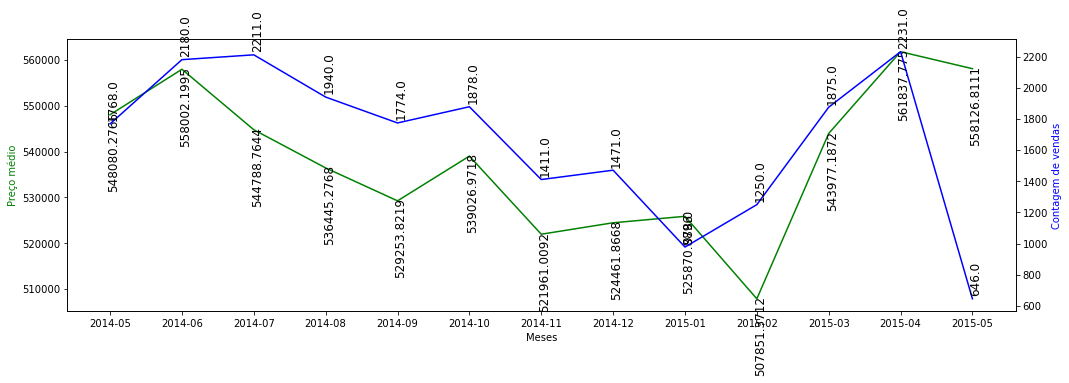

In [16]:
def autolabel(ax1, ax2):
    line1 = ax1.lines[0].get_xydata()
    line2 = ax2.lines[0].get_xydata()
    for xy1, xy2 in zip(line1, line2):
        x1, y1 = xy1[0], round(xy1[1], 4)
        x2, y2 = xy2[0], round(xy2[1], 4)
        ax1.annotate('{}'.format(y1), xy=(x1, y1), xytext=(-3, 3), textcoords="offset points", rotation=90, ha='left', va='top', fontsize=12)
        ax2.annotate('{}'.format(y2), xy=(x2, y2), xytext=(-3, 3), textcoords="offset points", rotation=90, ha='left', va='bottom', fontsize=12)

df_houses['year-month'] = df_houses['date'].apply(lambda x: str(x)[:7])
serie_time_by_price_mean = df_houses.groupby('year-month').mean().sort_index()['price']
print('- Variação de preço no período (maior preço menos o menor):', serie_time_by_price_mean.max()-serie_time_by_price_mean.min())
serie_time_by_sell_count = df_houses.groupby('year-month').count().sort_index()['price']
print('- Variação de contagem de vendas no período (maior contagem de vendas menos o menor):', serie_time_by_sell_count.max()-serie_time_by_sell_count.min())
print('- Correlação entre preço médio e contagem de vendas (menos o último mês que consideramos não ter completado):',
      spearmanr(serie_time_by_price_mean.values[:-1], serie_time_by_sell_count.values[:-1])[0])
fig, ax1 = plt.subplots(figsize=(17, 5))
ax2 = ax1.twinx()
ax1.plot(serie_time_by_price_mean.index.values, serie_time_by_price_mean.values, 'g-')
ax2.plot(serie_time_by_sell_count.index.values, serie_time_by_sell_count.values, 'b-')
ax1.set_xlabel('Meses')
ax1.set_ylabel('Preço médio', color='g')
ax2.set_ylabel('Contagem de vendas', color='b')
autolabel(ax1, ax2)
plt.show()

>A positiva e forte correlação (0.8112) entre os preços médios e as contagens de vendas ao longo dos meses mostra que o preço apenas acompanha a demanda, pois percebemos no gráfico que quando o preço atinge um determinado valor alto, a contagem de vendas diminui e o preço começa a cair em seguinda. Agora, vamos separar os dados por temporadas baixa e alta (de preços de venda) e refazer as correlações para cada uma. Olhando o gráfico acima, vamos determinar a baixa temporada entre 2014-11 e 2015-02, enquanto os outros meses são da alta temporada.

In [17]:
df_corr_pearson = df_houses.query('`year-month` >= "2014-11" and `year-month` <= "2015-02"').corr(method='spearman')[['price']]
df_corr_pearson.columns = ['"price" na baixa temporada de vendas']
df_corr_pearson['"price" na alta temporada de vendas'] = df_houses.query('`year-month` < "2014-11" or `year-month` > "2015-02"').corr(method='spearman')['price']
print('- Correlações para baixa e alta temporada de preços:')
display(df_corr_pearson.style.background_gradient(axis=None, vmin=-1, vmax=1, cmap="RdBu"))
df_corr_pearson_by_level = df_corr_pearson.apply(lambda col: col.apply(lambda x: get_corr_by_level(x)))
df_corr_pearson_by_level.style.applymap(lambda x: map_color_to_corr[x])

- Correlações para baixa e alta temporada de preços:


,"""price"" na baixa temporada de vendas","""price"" na alta temporada de vendas"
price,1.000000,1.000000
bedrooms,0.335540,0.347827
bathrooms,0.498188,0.495975
sqft_living,0.640235,0.645533
floors,0.324713,0.321142
waterfront,0.120768,0.113385
view,0.287724,0.296170
condition,0.005762,0.021566
grade,0.645398,0.662079
sqft_above,0.539746,0.542335


,"""price"" na baixa temporada de vendas","""price"" na alta temporada de vendas"
price,+ muito forte,+ muito forte
bedrooms,+ fraca,+ fraca
bathrooms,+ fraca,+ fraca
sqft_living,+ moderada,+ moderada
floors,+ fraca,+ fraca
waterfront,+ desprezível,+ desprezível
view,+ desprezível,+ desprezível
condition,+ desprezível,+ desprezível
grade,+ moderada,+ moderada
sqft_above,+ moderada,+ moderada


>Não há features que determinam mudanças de preços entre baixa e alta temporada.

>Até aqui tínhamos uma situação para tentarmos faturar mais com a compra e venda de imóveis: o momento para efetuarmos a compra do imóvel que é na baixa temporada de vendas considerando a sazonalidade do mercado de imóveis. A outra situação na tentativa de aumentar o faturamento é fazermos obras para valorizar o imóvel ao comprá-lo. As correlações não são suficientes para determinarmos se isso vai, de fato, causar esse aumento. Vamos, então, fazer agrupamentos para cada features tentando observá-lo enquanto mantemos as outras fixas, dentro de um intervalo de valores. Por exemplo, só podemos saber se aumentando a quantidade de banheiros, com a feature "bathrooms", aumentará o preço se compararmos imóveis com features de valores iguais ou próximos e com quantidade de banheiros diferentes. Detalhando ainda mais o exemplo, imagine imóveis com apenas o tamanho do lote, o tamanho da sala de estar, a quantidade de quartos e a quantidade de banheiros: um imóvel com área do lote 200, área da sala de estar 50, com 2 quartos e com 1 banheiro só pode ser comparado com outros de mesmos valores ou próximos, menos a quantidade de banheiro que é o alvo de comparação. Por isso temos a necessidade de agrupar nossos dados por valores ou faixas de valores para cada feature em relação a uma feature alvo de comparação. Todas as features de valores contínuos vamos converter em faixas de valores. A feature "price" será sempre o alvo final, não o de comparação. Ainda sobre as features a serem agrupadas, inclusive para criar as faixas de valores, vamos considerar somente as influenciadoras no preço: "bedrooms", "bathrooms", "floors", "grade", "sqft_above", "lat" e "sqft_living15".

In [18]:
list_features_convert_to_range = ['sqft_above', 'lat', 'sqft_living15']
df_houses_to_compare = df_houses.copy()
for feature in list_features_convert_to_range:
    df_houses_to_compare[feature] = pd.cut(
        df_houses_to_compare[feature], bins=np.linspace(df_houses_to_compare[feature].min(), df_houses_to_compare[feature].max(), num=5),
        right=False, include_lowest=True
    )
print('- Conversão de algumas features para faixas de valores:')
df_houses_to_compare[list_features_convert_to_range]

- Conversão de algumas features para faixas de valores:


,sqft_above,lat,sqft_living15
id,,,
7129300520,"[290.0, 2570.0)","[47.467, 47.622)","[399.0, 1851.75)"
6414100192,"[290.0, 2570.0)","[47.622, 47.778)","[399.0, 1851.75)"
5631500400,"[290.0, 2570.0)","[47.622, 47.778)","[1851.75, 3304.5)"
2487200875,"[290.0, 2570.0)","[47.467, 47.622)","[399.0, 1851.75)"
1954400510,"[290.0, 2570.0)","[47.467, 47.622)","[399.0, 1851.75)"
...,...,...,...
263000018,"[290.0, 2570.0)","[47.622, 47.778)","[399.0, 1851.75)"
6600060120,"[290.0, 2570.0)","[47.467, 47.622)","[399.0, 1851.75)"
1523300141,"[290.0, 2570.0)","[47.467, 47.622)","[399.0, 1851.75)"


>Para que uma feature possa ser comparada, ela deve ter pelo menos 2 grupos. Verificando quantos grupos cada feature tem...

In [19]:
list_features_to_compare = ['bedrooms', 'bathrooms', 'floors', 'grade', 'sqft_above', 'lat', 'sqft_living15']
for feature in list_features_to_compare:
    print(f'- Contagem de grupos com mais de um imóvel para "{feature}":', df_houses_to_compare[feature].value_counts().shape[0])

- Contagem de grupos com mais de um imóvel para "bedrooms": 13
- Contagem de grupos com mais de um imóvel para "bathrooms": 30
- Contagem de grupos com mais de um imóvel para "floors": 6
- Contagem de grupos com mais de um imóvel para "grade": 12
- Contagem de grupos com mais de um imóvel para "sqft_above": 4
- Contagem de grupos com mais de um imóvel para "lat": 4
- Contagem de grupos com mais de um imóvel para "sqft_living15": 4


>Todas as features candidatas a serem comparadas tem pelo menos 4 grupos. Vamos aplicar a comparação de uma feature. Nessa comparação, vamos agrupar os imóveis pelos valores de cada feature influenciável, agrupando por média de preços de venda e, ao mesmo tempo, por contagem de imóveis, eliminando aquelas com somente um imóvel (para que possa ser calculada a média de preços entre mais de um imóvel). Então calcularemos a correlação entre os preços médios e os valores de cada feature influenciável.

In [20]:
df1 = df_houses.groupby(list_features_to_compare).mean()[['price']]
df1.columns = ['mean_prices']
df2 = df_houses.groupby(list_features_to_compare).count()[['price']]
df1['count_houses'] = df2['price']
df1 = df1[df1['count_houses'] > 1].reset_index()
df1_corr = df1.drop('count_houses', axis=1).corr(method='spearman')[['mean_prices']]
percent = round(df1.shape[0]/df_houses.shape[0]*100, 2)
print('Percentual de imóveis nesse agrupamento em relação ao dataset original:', f'{percent}%')
display(
    df1.set_index(list_features_to_compare).sort_values('count_houses', ascending=False),
    df1_corr.style.background_gradient(axis=None, vmin=-1, vmax=1, cmap="RdBu"),
    df1_corr[['mean_prices']].apply(lambda col: col.apply(lambda x: get_corr_by_level(x))).style.applymap(lambda x: map_color_to_corr[x])
)

Percentual de imóveis nesse agrupamento em relação ao dataset original: 1.26%


mean_prices  \
bedrooms bathrooms floors grade sqft_above lat     sqft_living15                
2        2.50      3.0    8     980        47.6844 980               336575.0   
3        2.25      2.0    8     1080       47.6651 1280              508000.0   
         1.00      1.0    5     1080       47.5045 1070              132000.0   
2        2.25      2.0    7     1610       47.5184 1950              292000.0   
4        2.50      2.0    8     2130       47.5108 1830              388000.0   
...                                                                       ...   
3        1.75      1.0    7     980        47.4476 1500              258500.0   
                                           47.5208 1070              351500.0   
                                1080       47.4608 1250              267975.0   
                                1140       47.2933 1510              157875.0   
6        4.50      2.0    7     3500       47.7351 1550              516250.0   

                                                                  count_houses  
bedrooms bathrooms floors grade sqft_above lat     sqft_living15                
2        2.50      3.0    8     980        47.6844 980                       4  
3        2.25      2.0    8     1080       47.6651 1280                      3  
         1.00      1.0    5     1080       47.5045 1070                      3  
2        2.25      2.0    7     1610       47.5184 1950                      3  
4        2.50      2.0    8     2130       47.5108 1830                      3  
...                                                                        ...  
3        1.75      1.0    7     980        47.4476 1500                      2  
                                           47.5208 1070                      2  
                                1080       47.4608 1250                      2  
                                1140       47.2933 1510                      2  
6        4.50      2.0    7     3500       47.7351 1550                      2  

[273 rows x 2 columns]

,mean_prices
bedrooms,0.221471
bathrooms,0.497871
floors,0.368691
grade,0.655729
sqft_above,0.449261
lat,0.557350
sqft_living15,0.462871
mean_prices,1.000000


,mean_prices
bedrooms,+ desprezível
bathrooms,+ fraca
floors,+ fraca
grade,+ moderada
sqft_above,+ fraca
lat,+ moderada
sqft_living15,+ fraca
mean_prices,+ muito forte


>Com uma amostra de 273 imóveis com pelo menos um outro semelhante, não podemos garantir que é uma boa representação de todo dataset. Mas, se considerássemos que é boa e que o nível "moderada" de correlaçãoé significativo, temos as features "grade" e "lat" como partes dos imóveis que devemos aplicar obras (quando for aplicável) para aumentar o faturamento nas revendas. Mas, por precaução, vamos refazer todo esse processo de busca por imóveis semelhantes deixando sempre uma das sete feature livre para flutuar o valor, repetindo isso para as sete features por vez como flutuadora. Por exemplo, começamos a deixar flutuar a feature "bedrooms", agrupando imóveis semelhantes sem essa feature, gerando um primeiro novo dataset. Repetimos o processo para todas as sete features, obtendo sete novos datasets, do qual concatenaremos todas elas, formando um único e, então verificaremos, por fim, as correlações.

In [21]:
df_output = pd.DataFrame()
for feature in list_features_to_compare:
    list_features_to_compare_less_current_feature = np.setdiff1d(list_features_to_compare, [feature]).tolist()
    df1 = df_houses.groupby(list_features_to_compare_less_current_feature).mean()[['price']]
    df1.columns = ['mean_prices']
    df2 = df_houses.groupby(list_features_to_compare_less_current_feature).count()[['price']]
    df1['count_houses'] = df2['price']
    df1 = df1[df1['count_houses'] > 1]
    df_output = pd.concat([df_output, df1.reset_index()])
df_output_corr = df_output.drop('count_houses', axis=1).corr(method='spearman')[['mean_prices']]
percent = round(df_output.shape[0]/df_houses.shape[0]*100, 2)
print('Percentual de imóveis nesse agrupamento em relação ao dataset original:', f'{percent}%')
display(
    df_output.set_index(list_features_to_compare).sort_values('count_houses', ascending=False),
    df_output_corr.style.background_gradient(axis=None, vmin=-1, vmax=1, cmap="RdBu"),
    df_output_corr[['mean_prices']].apply(lambda col: col.apply(lambda x: get_corr_by_level(x))).style.applymap(lambda x: map_color_to_corr[x])
)

Percentual de imóveis nesse agrupamento em relação ao dataset original: 12.49%


mean_prices  \
bedrooms bathrooms floors grade sqft_above lat     sqft_living15                  
3.0      1.00      1.0    7.0   1160.0     NaN     1160.0         326071.428571   
         2.50      2.0    8.0   1800.0     NaN     1800.0         444144.000000   
                                2150.0     NaN     2150.0         468755.714286   
         1.00      1.0    6.0   1200.0     NaN     1200.0         223357.857143   
4.0      2.50      2.0    7.0   1830.0     NaN     1830.0         338700.000000   
...                                                                         ...   
6.0      1.50      1.0    NaN   1030.0     47.4869 1780.0         250500.000000   
2.0      1.75      1.0    NaN   1350.0     47.7176 1350.0         424975.000000   
                   2.0    NaN   1290.0     47.5171 1410.0         249300.000000   
3.0      1.75      1.0    NaN   1140.0     47.2933 1510.0         157875.000000   
6.0      4.50      2.0    7.0   3500.0     47.7351 NaN            516250.000000   

                                                                  count_houses  
bedrooms bathrooms floors grade sqft_above lat     sqft_living15                
3.0      1.00      1.0    7.0   1160.0     NaN     1160.0                    7  
         2.50      2.0    8.0   1800.0     NaN     1800.0                    7  
                                2150.0     NaN     2150.0                    7  
         1.00      1.0    6.0   1200.0     NaN     1200.0                    7  
4.0      2.50      2.0    7.0   1830.0     NaN     1830.0                    7  
...                                                                        ...  
6.0      1.50      1.0    NaN   1030.0     47.4869 1780.0                    2  
2.0      1.75      1.0    NaN   1350.0     47.7176 1350.0                    2  
                   2.0    NaN   1290.0     47.5171 1410.0                    2  
3.0      1.75      1.0    NaN   1140.0     47.2933 1510.0                    2  
6.0      4.50      2.0    7.0   3500.0     47.7351 NaN                       2  

[2699 rows x 2 columns]

,mean_prices
bathrooms,0.494494
floors,0.380916
grade,0.654372
lat,0.557507
sqft_above,0.460297
sqft_living15,0.495716
mean_prices,1.000000
bedrooms,0.247688


,mean_prices
bathrooms,+ fraca
floors,+ fraca
grade,+ moderada
lat,+ moderada
sqft_above,+ fraca
sqft_living15,+ fraca
mean_prices,+ muito forte
bedrooms,+ desprezível


>Com uma amostra de 2699, bem maior, continuamos com as features "grade" e "lat" como as influenciadoras no preço após obras (quando for aplicável). Em outras palavras, o que podemos fazer para valorizar os imóveis comprados para revenda é:
>1. **grade**: substituir materiais antigos por novos e de melhor qualidade no acabamento (por exemplo, pisos, pintura, telhado, etc.);
>2. **lat**: não se aplica obra nesse caso, apenas devemos comprar para revenda os imóveis mais ao norte devido a correlação positiva (aumenta indo em direção ao norte).

# 3. Respondendo às perguntas
1. Quais casas a empresa deve comprar e por quais preços de compra?
2. Uma vez as casas em posse da empresa, qual o melhor momento para vendê-las e qual seria os preços de venda?
3. A Empresa deve fazer reformas para aumentar os preços de venda? Quais seriam as sugestões de mudanças? Quais incrementos nos preços dados por cada opção de reforma?

Para responder à primeira pergunta, temos que comprar para revenda os imóveis pelo preço máximo de \\$ 525,871.00 entre os meses de Novembro e Fevereiro (preço médio máximo entre os meses da baixa temporada de vendas).A escolha das casas a serem compradas ainda dependem de outros fatores, envolvendo a terceira pergunta, onde precisamos filtrar imóveis que ainda estejam com baixos níveis da feature "grade" e mais ao norte. Para a segunda pergunta, o melhor momento de revenda está entre os meses de Abril e Junho pelo preço mínimo de \\$ 548,080.00 (preço médio mínimo entre os meses da alta temporada de vendas). E para responder à terceira pergunta, precisamos avaliar os incrementos no acabamento (melhora de nível da feature "grade") e na localização ( mais ao norte, feature "lat").

>Vamos filtrar os imóveis segundo o preço máximo na baixa temporada...

>Agora, vamos verificar as distribuições dos valores para "grade" e "lat" a fim de determinarmos um corte para filtrarmos aqueles que devemos escolher para compra. Vamos usar também o gráfico de boxplot que nos dará valores de corte por quartis...

- Primeiro quartil para "grade": 7.0


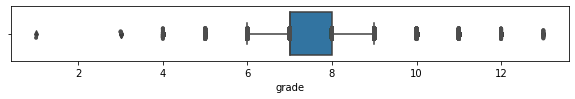

- Primeiro quartil para "lat": 47.471


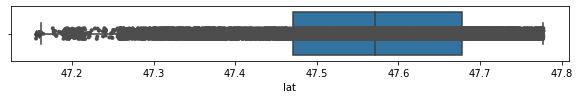

In [22]:
print('- Primeiro quartil para "grade":', np.quantile(df_houses['grade'].values, 0.25))
fig, ax = plt.subplots(figsize=(10, 1))
sns.boxplot(x="grade", data=df_houses)#, whis=[0, 100], width=.6, palette="vlag")
sns.stripplot(x="grade", data=df_houses, size=4, color=".3", linewidth=0)
plt.show()
print('- Primeiro quartil para "lat":', np.quantile(df_houses['lat'].values, 0.25))
fig, ax = plt.subplots(figsize=(10, 1))
sns.boxplot(x="lat", data=df_houses)#, whis=[0, 100], width=.6, palette="vlag")
sns.stripplot(x="lat", data=df_houses, size=4, color=".3", linewidth=0)
plt.show()

>Como não temos uma referência externa, vamos aplicar um valor usual, como o primeiro quartil. Abaixo desse limite estão os imóveis que devemos comprar para "grade" e fazer obras de melhoria de acabamento para que os imóveis atinjam o nível mínimo igual ao primeiro quartil. Esse quartil é o nível de "grade" igual a "7" que é, coincidentemente, o nível médio também. Quanto à "lat", obra não é aplicável nesse caso. Apenas devemos comprar casas mais ao norte, considerando o primeiro quartil de valor igual a 47.471. Imóveis com "lat" acima desse valor são candidatos à nossa compra.

>Ainda para a "grade", precisamos saber o quanto podemos agregar de valor no imóvel após obras para melhorar o acabamento. Para isso, vamos comparar preços médios de imóveis com níveis baixos de "grade" (menor que 7, dentro do primeiro quartil) em relação aos de níveis mais altos, tendo em mente que compraremos na baixa temporada e venderemos na alta com níveis de grade igual ou maior que 7 após obras. Portanto, vamosfazer essa comparação somente na alta temporada. E, para ficar uma comparação mais justa, vamos fazer várias comparações agrupadas por faixas de valores de "lat". No final, teremos a média geral de preços obtidos da média de cada grupo desses.

In [23]:
df_houses_to_buy_and_sell = df_houses.query('lat >= 47.38').copy()
df_houses_to_buy_and_sell['range_lat'] = pd.cut(
    df_houses_to_buy_and_sell['lat'], bins=np.linspace(df_houses_to_buy_and_sell['lat'].min(), df_houses_to_buy_and_sell['lat'].max(), num=5),
    right=False, include_lowest=True
)
display(df_houses_to_buy_and_sell['range_lat'].value_counts(dropna=False).to_frame('count_range_lat'), df_houses_to_buy_and_sell)

,count_range_lat
"[47.479, 47.579)",5478
"[47.678, 47.778)",5378
"[47.579, 47.678)",5074
"[47.38, 47.479)",2355
NaN,3


,date,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,...,zipcode,lat,long,sqft_living15,sqft_lot15,count_days_sold,diff_sqft_living15_with_sqft_living,diff_sqft_lot15_with_sqft_lot,year-month,range_lat
id,,,,,,,,,,,,,,,,,,,,,
7129300520,2014-10-13,221900.0,3,1.00,1180,1.0,0,0,3,7,...,98178,47.5112,-122.257,1340,5650,226,160,0,2014-10,"[47.479, 47.579)"
6414100192,2014-12-09,538000.0,3,2.25,2570,2.0,0,0,3,7,...,98125,47.7210,-122.319,1690,7639,169,-880,397,2014-12,"[47.678, 47.778)"
5631500400,2015-02-25,180000.0,2,1.00,770,1.0,0,0,3,6,...,98028,47.7379,-122.233,2720,8062,91,1950,-1938,2015-02,"[47.678, 47.778)"
2487200875,2014-12-09,604000.0,4,3.00,1960,1.0,0,0,5,7,...,98136,47.5208,-122.393,1360,5000,169,-600,0,2014-12,"[47.479, 47.579)"
1954400510,2015-02-18,510000.0,3,2.00,1680,1.0,0,0,3,8,...,98074,47.6168,-122.045,1800,7503,98,120,-577,2015-02,"[47.579, 47.678)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,2014-05-21,360000.0,3,2.50,1530,3.0,0,0,3,8,...,98103,47.6993,-122.346,1530,1509,371,0,378,2014-05,"[47.678, 47.778)"
6600060120,2015-02-23,400000.0,4,2.50,2310,2.0,0,0,3,8,...,98146,47.5107,-122.362,1830,7200,93,-480,1387,2015-02,"[47.479, 47.579)"
1523300141,2014-06-23,402101.0,2,0.75,1020,2.0,0,0,3,7,...,98144,47.5944,-122.299,1020,2007,338,0,657,2014-06,"[47.579, 47.678)"


In [24]:
list_diff_mean_prices_by_range_lat_and_grade = []
list_diff_mean_prices_by_range_lat_and_temporary = []
for range_lat in df_houses_to_buy_and_sell['range_lat'].value_counts().index.values:
    df = df_houses_to_buy_and_sell[df_houses_to_buy_and_sell['range_lat'] == range_lat]
    df_high_temporary_low_grade = df.query('price > 548080 and grade < 7 and (`year-month` <= "2014-07" or `year-month` >= "2015-04")')
    mean_price_high_temporary_low_grade = df_high_temporary_low_grade['price'].mean()
    df_high_temporary_high_grade = df.query('price > 548080 and grade >= 7 and (`year-month` <= "2014-07" or `year-month` >= "2015-04")')
    mean_price_high_temporary_high_grade = df_high_temporary_high_grade['price'].mean()
    diff_means_grade = mean_price_high_temporary_high_grade-mean_price_high_temporary_low_grade
    list_diff_mean_prices_by_range_lat_and_grade.append(diff_means_grade)
    df_low_temporary = df.query('price < 525871 and `year-month` >= "2014-11" and `year-month` <= "2015-02"')
    mean_price_low_temporary = df_low_temporary['price'].mean()
    df_high_temporary = df.query('price > 548080 and (`year-month` <= "2014-07" or `year-month` >= "2015-04")')
    mean_price_high_temporary = df_high_temporary['price'].mean()
    diff_means_temporary = mean_price_high_temporary - mean_price_low_temporary
    list_diff_mean_prices_by_range_lat_and_temporary.append(diff_means_temporary)
    print(f'- Para a faixa de "lat" {range_lat} na alta temporada, a diferença de preço médio entre "grades" alta e baixa é de {diff_means_grade}.',
          f'\n  E para a mesma faixa de "lat", a diferença de preço médio entre temporadas alta e baixa é de {diff_means_temporary}.\n')
print('- Média geral das diferença por "grade":', np.mean(list_diff_mean_prices_by_range_lat_and_grade), '\n')
print('- Média geral das diferença por temporada:', np.mean(list_diff_mean_prices_by_range_lat_and_temporary), '\n')

- Para a faixa de "lat" [47.479, 47.579) na alta temporada, a diferença de preço médio entre "grades" alta e baixa é de 149522.0273972603. 
  E para a mesma faixa de "lat", a diferença de preço médio entre temporadas alta e baixa é de 522415.4965747977.

- Para a faixa de "lat" [47.678, 47.778) na alta temporada, a diferença de preço médio entre "grades" alta e baixa é de 79660.34706616728. 
  E para a mesma faixa de "lat", a diferença de preço médio entre temporadas alta e baixa é de 369764.63441185915.

- Para a faixa de "lat" [47.579, 47.678) na alta temporada, a diferença de preço médio entre "grades" alta e baixa é de 278934.50292166776. 
  E para a mesma faixa de "lat", a diferença de preço médio entre temporadas alta e baixa é de 499023.79713661736.

- Para a faixa de "lat" [47.38, 47.479) na alta temporada, a diferença de preço médio entre "grades" alta e baixa é de 82025.48780487804. 
  E para a mesma faixa de "lat", a diferença de preço médio entre temporadas alta e baixa é d

>A maior agregação de valor unicamente por temporada, comprando imóveis na baixa temporada por menos de \\$ 525,871.00 e vendendo na alta por \\$ 548,080.00, foi entre as latitudes 47.479 e 47.579 com valor agregado médio em torno de \\$ 522,415.00. Já, a maior agregação por obras de melhoria e acabamento, aumentando o nível de "grade", foi entre as latitudes 47.579 e 47.678 com valor agregado médio em torno de \\$ 278,934.00, aumentando consideravelmente a receita com essas obras. No geral, os valores agregados foram em média de \\$ 456,006.00 so para comprar na baixa e vender na alta temporada e que pode ampliar em mais \\$ 147,536.00 em média se fizer obras de melhorias e acabamento.

## 3.1. Quais casas a empresa deve comprar e por quais preços de compra?
São aquelas com preço máximo de \\$ 525,871.00, com nível de "grade" abaixo de 7. Para maior faturamento, devem ser compradas na baixa temporada, entre Novembro e Fevereiro.

## 3.2. Uma vez as casas em posse da empresa, qual o melhor momento para vendê-las e qual seria os preços de venda?
O melhor momento de venda está na temporada de alta, entre Abril e Julho por um preço mínimo de \\$ 548,080.00. Compradas na baixa temporada, as vendas na alta temporada terão lucro médio por imóvel de \\$ 456,006.00.

## 3.2. A Empresa deve fazer reformas para aumentar os preços de venda? Quais seriam as sugestões de mudanças? Quais incrementos nos preços dados por cada opção de reforma?
Se a empresa fazer reformas de melhoria e acabamento, aumentando o nível de "grade" para igual ou maior que 7, o valor agregado ao preço do imóvel será de \\$ 147,536.00 em média. Portanto a empresa deve sim fazer reforma desse tipo.